/Users/imjeonghun/miniforge3/envs/cs520/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.2-CAPI-1.17.2). Conversions between both will be slow.
  warnings.warn(


<Axes: >

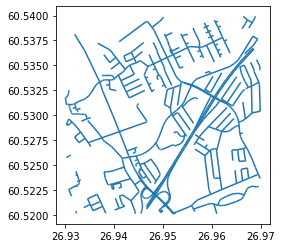

In [1]:
from pyrosm import get_data, OSM
import matplotlib.pyplot as plt
import pandas as pd


def get_xy(nodes, node_id):
    node_row = nodes.loc[nodes['id'] == node_id]
    return (node_row['lon'].tolist()[0], node_row['lat'].tolist()[0])


# "test_pbf", "Helsinki"
map_name = 'test_pbf'

osm = OSM(get_data('test_pbf'))
nodes, edges = osm.get_network(network_type="driving", nodes=True)

nodes = nodes[['lon', 'lat', 'id']]


edges.plot()
    

In [2]:
nodes.sort_values(by=['lon', 'lat'])

,lon,lat,id
735,26.930063,60.531739,3350088322
279,26.930239,60.525762,818778962
594,26.930253,60.529122,1517568878
601,26.930254,60.531075,3350088321
736,26.930390,60.531856,3350088323
...,...,...,...
477,26.969768,60.534702,6231004037
476,26.969799,60.534547,5626429910
475,26.969806,60.534512,960407207
808,26.969827,60.523651,3684592346


In [3]:
nodes = pd.read_csv("maps/test.maxGroup.nodes.csv")
edges = pd.read_csv("maps/test.maxGroup.edges.csv")
nodes.sort_values(by=['lon', 'lat'])

,Unnamed: 0,id,lon,lat
589,589,3350088322,26.93006,60.53174
439,439,1517568878,26.93025,60.52912
590,590,3350088321,26.93025,60.53108
629,629,3350088323,26.93039,60.53186
461,461,773542247,26.93046,60.53109
...,...,...,...,...
120,120,3684592331,26.96951,60.52284
511,511,960407261,26.96955,60.53331
330,330,6231004028,26.96966,60.53310
597,597,3684592346,26.96983,60.52365


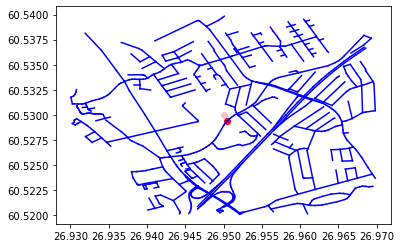

1809105100


In [4]:
from Graph import Graph
g = Graph()

x, y = 26.93, 60.52
x, y = 26.960, 60.5375 
x, y = 26.9500, 60.5300
node_id, node = g.getNearestNode(x, y)
plt.scatter(x, y, color="pink")

for index, row in edges.iterrows():
    u_id, v_id = row['u'], row['v']

    u, v = get_xy(nodes, u_id), get_xy(nodes, v_id)
    
    plt.plot([u[0], v[0]], [u[1], v[1]], color='blue')
    
plt.scatter(node[0], node[1], color="red")
    
plt.show()
print(node_id)

In [5]:
nodes.loc[nodes['id'] == 3735779715]

,Unnamed: 0,id,lon,lat


In [6]:

source, target = 960407257, 3350088311
source, target = 3350088322	, 960407257
# source = g.getRandomNode()
# target = g.getRandomNode()
# print(source, target)
source, target = g.RandomNodeId(), g.RandomNodeId()
print(source, target)
print(nodes[nodes['id'].isin([source, target])])

def plot_path(edges, coords):
    
    for index, row in edges.iterrows():
        u_id, v_id = row['u'], row['v']
        u, v = get_xy(nodes, u_id), get_xy(nodes, v_id)
        plt.plot([u[0], v[0]], [u[1], v[1]], color='blue')

    for i in range(len(coords)-1):
        plt.plot([coords[i][0], coords[i+1][0]], [coords[i][1], coords[i+1][1]], color='red')
    plt.show()
    

1364702640 960407236
     Unnamed: 0          id       lon       lat
5             5   960407236  26.96380  60.53021
687         687  1364702640  26.94717  60.52259


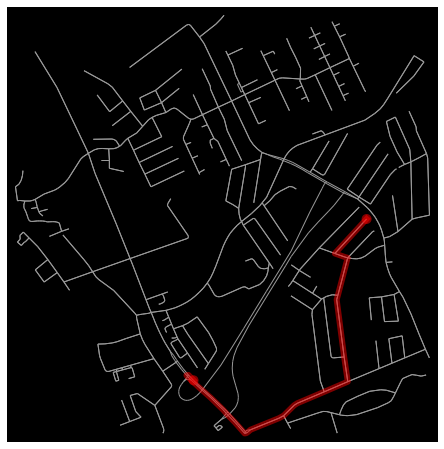

In [7]:

import osmnx as ox
import networkx as nx
osm = OSM(get_data('test_pbf'))
nodes, edges = osm.get_network(network_type="driving", nodes=True)
G = osm.to_graph(nodes, edges, graph_type="networkx")
route = nx.shortest_path(G, source, target, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

length: 1968.2099999999998


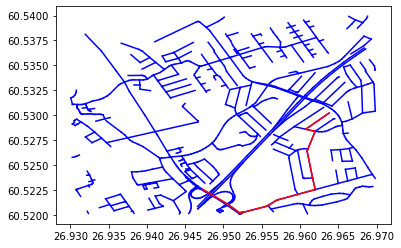

length: 3075.1000000000004


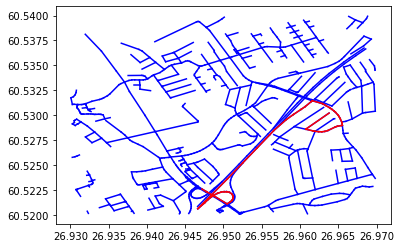

[[26.94717 60.52259]
 [26.94778 60.52231]
 [26.94891 60.52181]
 [26.95047 60.52109]
 [26.95087 60.52128]
 [26.95107 60.5214 ]
 [26.95114 60.52147]
 [26.95121 60.52158]
 [26.95125 60.52168]
 [26.95127 60.52179]
 [26.95124 60.52188]
 [26.95119 60.52196]
 [26.95107 60.5221 ]
 [26.95078 60.52225]
 [26.95041 60.52232]
 [26.95007 60.52232]
 [26.9497  60.52227]
 [26.94923 60.52215]
 [26.94879 60.52199]
 [26.94844 60.5218 ]
 [26.94794 60.52149]
 [26.94751 60.52117]
 [26.94664 60.5206 ]
 [26.95051 60.5236 ]
 [26.95251 60.5252 ]
 [26.95441 60.52672]
 [26.95601 60.528  ]
 [26.95656 60.52845]
 [26.95821 60.52956]
 [26.95914 60.53007]
 [26.96016 60.53059]
 [26.96068 60.53086]
 [26.96148 60.53137]
 [26.9616  60.53145]
 [26.96293 60.53116]
 [26.96336 60.53097]
 [26.96386 60.53075]
 [26.96415 60.53059]
 [26.96443 60.53043]
 [26.96464 60.53029]
 [26.96494 60.53003]
 [26.9651  60.52986]
 [26.96524 60.52967]
 [26.96545 60.52931]
 [26.9655  60.52918]
 [26.96553 60.52898]
 [26.96544 60.52896]
 [26.9649  60

In [10]:
length, coords = g.shortestPath(source, target)
print('length:', length)
plot_path(edges, coords)

length, coords = g.randomPath(source, target)
print('length:', length)
plot_path(edges, coords)
print(coords)

In [9]:

# backend: graph, algorithm, api
# frontend: react